In [1]:
!python --version

Python 3.10.0


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Importing the data
credit_df = pd.read_csv("german_credit_data.csv", index_col=0)
credit_df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [3]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [4]:
credit_df.shape

(1000, 10)

In [5]:
credit_df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [14]:
credit_df.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

In [7]:
credit_df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [24]:
print("Saving accounts", credit_df['Saving accounts'].unique())
print("Checking accounts", credit_df['Checking account'].unique())

Saving accounts [nan 'little' 'quite rich' 'rich' 'moderate']
Checking accounts ['little' 'moderate' nan 'rich']


In [25]:
credit_df["Saving accounts"].fillna("none", inplace=True)
credit_df["Checking account"].fillna("none", inplace=True)

In [26]:
credit_df.isna().any()

Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts     False
Checking account    False
Credit amount       False
Duration            False
Purpose             False
Risk                False
dtype: bool

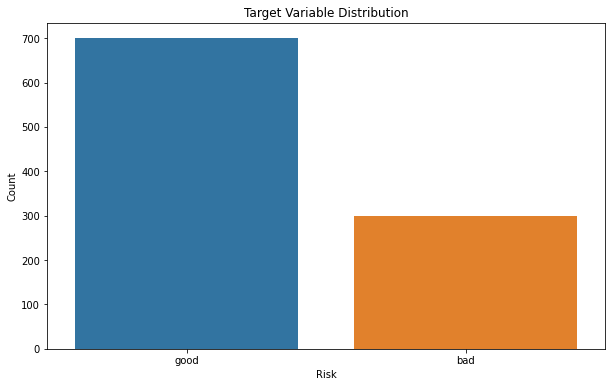

In [38]:
plt.figure(figsize=(10, 6))
plt.title("Target Variable Distribution")
sns.barplot(x=credit_df["Risk"].value_counts().index.values, y=credit_df["Risk"].value_counts().values, data=credit_df)
plt.xlabel("Risk")
plt.ylabel("Count")
plt.show()

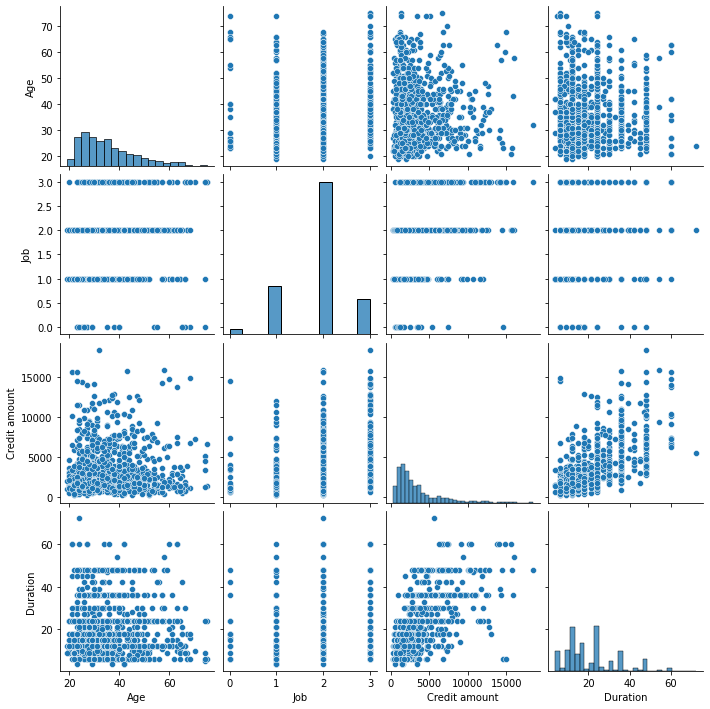

In [39]:
sns.pairplot(data=credit_df)

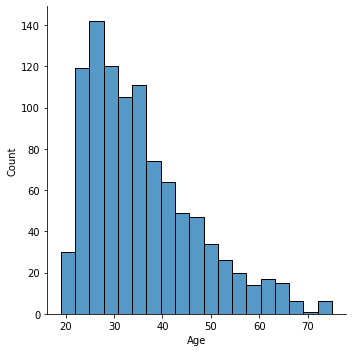

In [76]:
good_risk_age = credit_df.loc[credit_df["Risk"] == 'good']['Age'].values.tolist()
bad_risk_age = credit_df.loc[credit_df["Risk"] == 'bad']['Age'].values.tolist()

